LINEAR REGRESSION WITH PYTORCH

In [ ]:
# import required libraries
import torch
import torchvision
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import torch.nn as nn
from sklearn import datasets

PYTORCH DESIGN FOR MODEL EXECUTION

In [ ]:
# Design model (input, output, forward pass) with a OOP design 
# Construct loss and optimizer
# Create a training loop
#   - forward pass : compute prediction and loss
#   - backward pass: compute gradient
#   - optimizer: update weights


In [ ]:
class LinearRegression(nn.Module):

  def __init__(self, input_dim, output_dim):

    super(LinearRegression, self).__init__()

    self.lin = nn.Linear(input_dim, output_dim)

  def forward(self,x):

    return self.lin(x)

  


In [ ]:
# prepare dataset
X_numpy, y_numpy = datasets.make_regression(n_samples = 100, n_features=1, noise=20, random_state=4)

# convert the feature and target to torch variable
X = torch.from_numpy(X_numpy.astype(np.float32))
y_t = torch.from_numpy(y_numpy.astype(np.float32))

# reshape the target into a vector
y = y_t.view(y_t.shape[0], 1)


print(f"X_shape: {X.shape}")
print(f'Target shape: {y.shape}')



X_shape: torch.Size([100, 1])
Target shape: torch.Size([100, 1])


In [ ]:
n_sample, n_features = X.shape
input_size = n_features
output_size = 1
print(n_sample, n_features)

100 1


In [ ]:
n_sample, n_features = X.shape
input_size = n_features
output_size = 1

# instantiate the model
model = LinearRegression(input_size, output_size)

# instantiate the loss MSE
criterion = nn.MSELoss()


learning_rate = 0.01
num_epochs = 100

# optimizer to update the weights
opt = torch.optim.SGD(model.parameters(), lr = learning_rate)



for epoch in range(num_epochs):
  # make a prediction, forward pass
  prediction = model(X)

  # calculate the loss
  loss = criterion(prediction, y)

  # compute the gradient, backward pass
  loss.backward()

  # update the weights
  opt.step()

  # empty the grdients for next iteration
  opt.zero_grad()

  if epoch % 10 == 0:
    print(f'epoch - {epoch+1}, loss: {loss.item():.4f}')


epoch 1- loss: 5652.1650
epoch 11- loss: 3945.7649
epoch 21- loss: 2782.9355
epoch 31- loss: 1990.3475
epoch 41- loss: 1450.0012
epoch 51- loss: 1081.5422
epoch 61- loss: 830.2402
epoch 71- loss: 658.8083
epoch 81- loss: 541.8389
epoch 91- loss: 462.0141


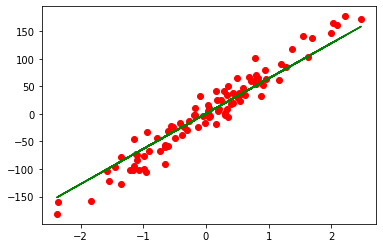

In [ ]:
# detach to avoid grad computation
predictions = model(X).detach().numpy()

plt.plot(X_numpy, y_numpy, 'ro')
plt.plot(X_numpy, predictions, 'g')

plt.show()